# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
data = cifar100.load_data(label_mode='fine')

In [2]:
# Your code here
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
# Your code here
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
y_train = y_train / 255.0
y_train = y_train / 255.0
num_classes = 100
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_val_one_hot = to_categorical(y_val)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train_one_hot = to_categorical(y_train, 100)
y_test_one_hot = to_categorical(y_test, 100)

# Split training data into training and validation sets
x_train, x_val, y_train_one_hot, y_val_one_hot = train_test_split(x_train, y_train_one_hot, test_size=0.2, random_state=42)

# Check the shapes to ensure they match
print(f"x_train shape: {x_train.shape}")
print(f"y_train_one_hot shape: {y_train_one_hot.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val_one_hot shape: {y_val_one_hot.shape}")

def classif_model(num_classes):
    model_input = Input(shape=(32, 32, 3))

    x = Conv2D(32, (3, 3), padding='same')(model_input)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(512)(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    
    x = Dense(256)(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)

    class_prediction_head = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=model_input, outputs=class_prediction_head)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy',Precision()])
    model.summary()
    return model


x_train shape: (40000, 32, 32, 3)
y_train_one_hot shape: (40000, 100)
x_val shape: (10000, 32, 32, 3)
y_val_one_hot shape: (10000, 100)


### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______Categorical Cross-Entropy Loss:
 When dealing with multi-class classification problems where each image belongs to one of several classes.
Why: It measures the performance of a classification model whose output is a probability value between 0 and 1. It calculates the difference between the predicted probability distribution and the actual distribution (one-hot encoded labels), making it ideal for multi-class classification tasks.


- <b>Optimizer:</b> Adam -  It computes adaptive learning rates for each parameter. This is particularly useful for image classification tasks where the gradient can vary significantly across different layers.Adam can handle sparse gradients on noisy problems, which are common in image data. This means it can effectively deal with situations where only a few pixels might be significant for the classification.It generally performs well out of the box with default parameters. This makes it a good starting point for  image classification problems.
Additionally, Adam often requires less hyperparameter tuning compared to other optimizers like SGD . This can save time and computational resources during the model development phase.It is also computationally efficient and has low memory requirements. This makes it suitable for large datasets and deep neural networks typically used in image classification.

In [5]:
import numpy as np
num_classes = 100
model = classif_model(num_classes)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 64)        0         
                                                             

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

I used 10 as the initial baseline and then experimented with other values increasing to 20

The validation loss decreases slightly with increasing epoch and the accuracy was not increasing significantly but it was steadily increasing suggesting that a higher epoch could train the model for higher accuracy.
I could not try higher numbers due to CPU/Colab number of tries limitations. But it seems like a slow learning model and may need a very high epoch to train
(Training for too many epochs can lead to overfitting, where the model performs well on training data but poorly on unseen validation data.Fewer epochs mean less computational time and resources are required, which is useful for initial testing and model tuning.)

In [6]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [7]:
# Your code here

history = model.fit(
    x_train, 
    y_train_one_hot,  # Only the class labels
    validation_data=(x_val, y_val_one_hot),  # Validation data with matching sizes
    epochs=20, 
    batch_size=32
)

Epoch 1/20
1250/1250 [==============================] - 124s 97ms/step - loss: 4.4793 - accuracy: 0.0245 - precision: 0.2326 - val_loss: 4.2167 - val_accuracy: 0.0539 - val_precision: 0.0000e+00
Epoch 2/20
1250/1250 [==============================] - 93s 75ms/step - loss: 4.1827 - accuracy: 0.0551 - precision: 0.3317 - val_loss: 3.8770 - val_accuracy: 0.1186 - val_precision: 0.8000
Epoch 3/20
1250/1250 [==============================] - 329s 263ms/step - loss: 3.9480 - accuracy: 0.0903 - precision: 0.3975 - val_loss: 3.6687 - val_accuracy: 0.1437 - val_precision: 0.7200
Epoch 4/20
1250/1250 [==============================] - 122s 97ms/step - loss: 3.7793 - accuracy: 0.1176 - precision: 0.4597 - val_loss: 3.5040 - val_accuracy: 0.1766 - val_precision: 0.7327
Epoch 5/20
1250/1250 [==============================] - 119s 95ms/step - loss: 3.6453 - accuracy: 0.1371 - precision: 0.4963 - val_loss: 3.3871 - val_accuracy: 0.1974 - val_precision: 0.7399
Epoch 6/20
1250/1250 [===================

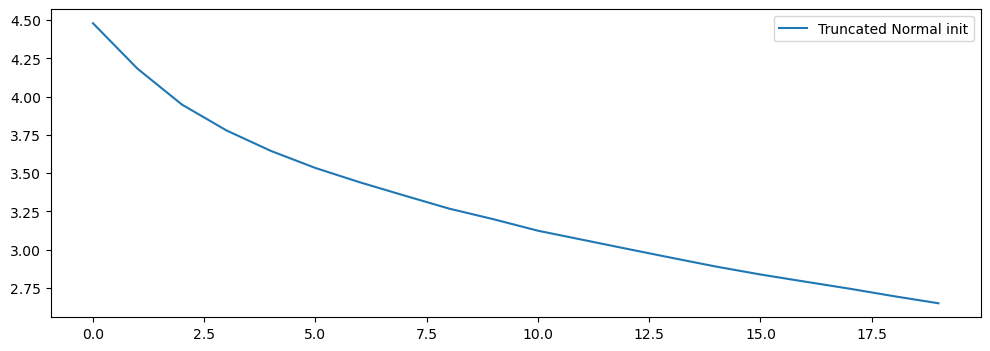

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label="Truncated Normal init")
plt.legend();

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> _An accuracy of 36.40% is very low, indicating that the model is only correctly predicting around 36.4% of the instances. This is a clear sign that the model is performing poorly on the classification task.
- <b>Other metric:</b> _Precision measures the proportion of true positive predictions out of all positive predictions made by the model. The precision value indicates that 74.44% of the instances predicted as positive are actually positive. But a higher number is desirable.
- <b>Reason for selection:</b> _It is important to identify the proportion of true positive predictions out of all positive predictions, to understand the performance of our model
- <b>Value of metric:</b> _ 80.51% of predictions are true.
- <b>Interpretation of metric value:</b> _ The low accuracy and somewhat low precision suggest that this model is not performing well and it needs more training or a different model to achieve better results

In [9]:
# Your code here
loss, accuracy, precision = model.evaluate(x_test, y_test_one_hot)
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')

313/313 [==============================] - 8s 25ms/step - loss: 2.5446 - accuracy: 0.3640 - precision: 0.8051
Loss:     2.54
Accuracy: 36.40%
Precision: 80.51%


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

Training and Validation Accuracy Plot:
 If the model is learning effectively, the training accuracy should increase while the training loss decreases over epochs. But we see that the accuracy doesn't increase significantly suggesting that the model may need more training or a better model should be created.

Correct and Incorrect Classification:

The correct classification image should have high probability for the true class and lower probabilities for other classes. The incorrect classification will likely have the highest probability for the wrong class, with the true class having a lower probability. But our results does not showcase this which suggests model uncertainity. The model seems to be underfitting or overfitting. We may need to train more or use more complex model/hyper parameters.

Results Discussion:
The plots shows a slow increase in accuracy and decrease in loss over the epochs, indicating that the model needs more training(epochs) to achieve higher accuracy


While the model's performance may have improved, further enhancements can be achieved through techniques like data augmentation, or  deeper architectures.

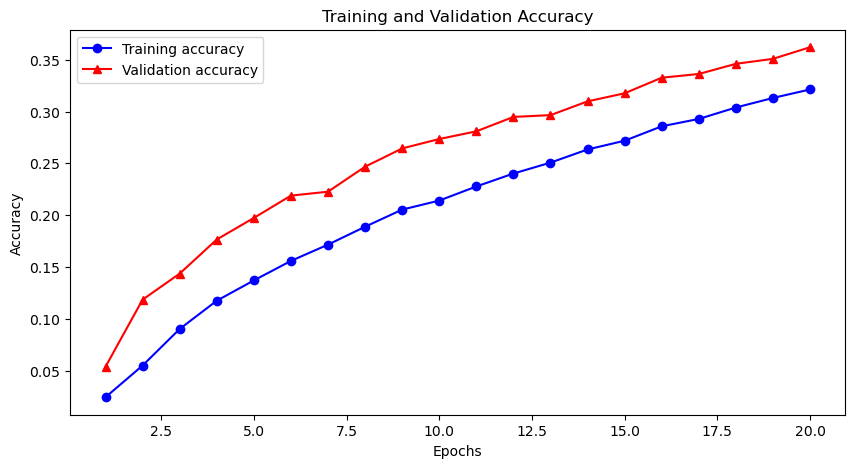

In [12]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Extracting accuracy and validation accuracy
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(accuracy) + 1)
    
    # Plotting the accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r^-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Example usage
plot_training_history(history)


313/313 [==============================] - 5s 17ms/step
Correct Classification:


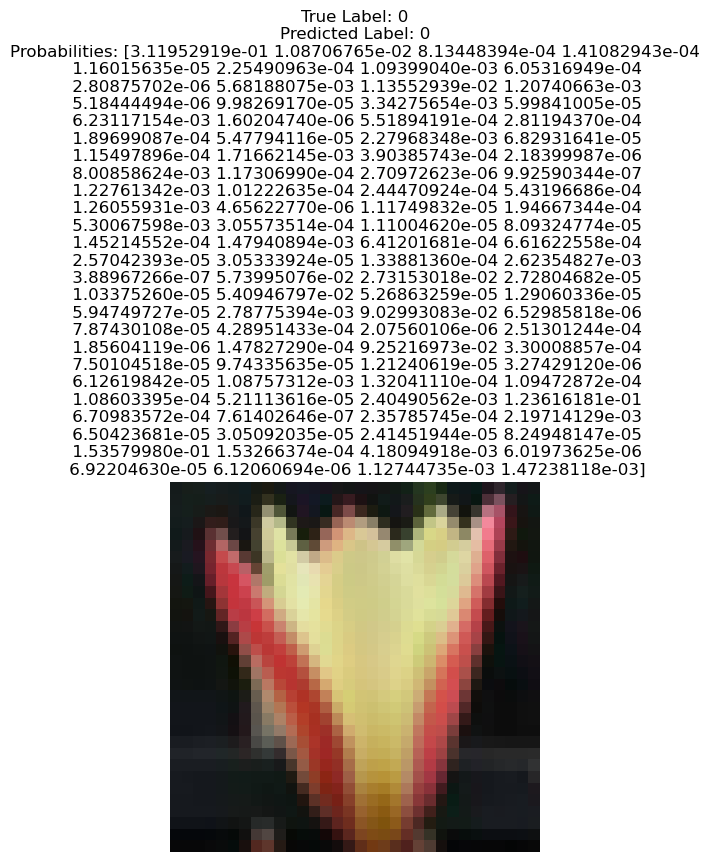

Incorrect Classification:


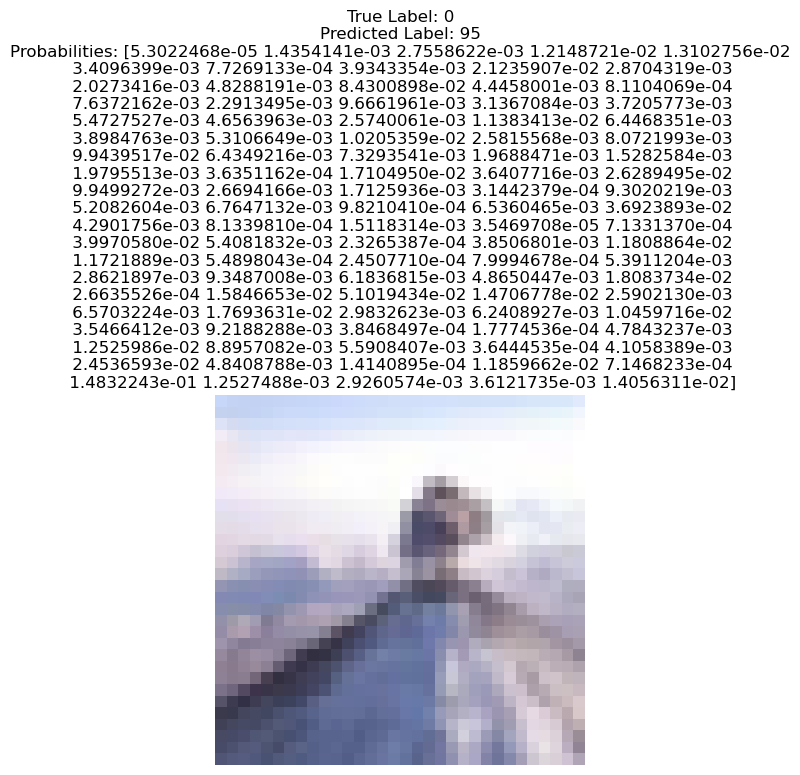

In [13]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Assuming x_test and y_test are already defined and preprocessed
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Find correct and incorrect predictions
correct_indices = np.nonzero(y_pred_classes == y_true)[0]
incorrect_indices = np.nonzero(y_pred_classes != y_true)[0]

# Select one correct and one incorrect example
correct_index = correct_indices[0]
incorrect_index = incorrect_indices[0]

# Plotting the images and showing the model's classification probabilities
def plot_image(index, correct=True):
    image = x_test[index]
    true_label = y_true[index]
    predicted_probabilities = y_pred[index]
    predicted_label = y_pred_classes[index]

    plt.imshow(image)
    plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}\nProbabilities: {predicted_probabilities}")
    plt.axis('off')
    plt.show()

# Plot correct classification
print("Correct Classification:")
plot_image(correct_index, correct=True)

# Plot incorrect classification
print("Incorrect Classification:")
plot_image(incorrect_index, correct=False)

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
The problem we had with the initial model was that it was too slow to train. Batch Normalisation technique normalizes the inputs of each layer so that they have a mean of zero and a standard deviation of one. This can lead to faster convergence and better performance by stabilizing and accelerating the training process. I also switched to ELU which can be beneficial if faster convergence is desired. 
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.
I used learning rate = 1e-4 for the Adam optimizer. I used the default value and did not have to alter the rate as the results were better due to other techniques used

In [14]:
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall

def create_advanced_cnn_model(num_classes):
    model_input = Input(shape=(32, 32, 3))

    x = Conv2D(32, (3, 3), padding='same')(model_input)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(128, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('elu')(x)
    x = MaxPooling2D((2, 2))(x)

    x = Flatten()(x)
    x = Dense(512)(x)
    x = Activation('elu')(x)
    x = Dropout(0.5)(x)
    
    x = Dense(256)(x)
    x = Activation('elu')(x)
    x = Dropout(0.5)(x)

    class_prediction_head = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=model_input, outputs=class_prediction_head)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy',Precision()])

    return model

In [15]:
import numpy as np
num_classes = 100
model = create_advanced_cnn_model(num_classes)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation_5 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        1849

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [16]:
# Your code here

history = model.fit(
    x_train, 
    y_train_one_hot,  # Only the class labels
    validation_data=(x_val, y_val_one_hot),  # Validation data with matching sizes
    epochs=20, 
    batch_size=32
)

Epoch 1/20
1250/1250 [==============================] - 423s 337ms/step - loss: 4.6292 - accuracy: 0.0554 - precision_1: 0.2779 - val_loss: 3.6460 - val_accuracy: 0.1712 - val_precision_1: 0.7769
Epoch 2/20
1250/1250 [==============================] - 462s 370ms/step - loss: 4.0407 - accuracy: 0.1099 - precision_1: 0.3947 - val_loss: 3.3044 - val_accuracy: 0.2292 - val_precision_1: 0.7476
Epoch 3/20
1250/1250 [==============================] - 443s 355ms/step - loss: 3.7179 - accuracy: 0.1505 - precision_1: 0.4600 - val_loss: 3.1037 - val_accuracy: 0.2650 - val_precision_1: 0.7135
Epoch 4/20
1250/1250 [==============================] - 450s 360ms/step - loss: 3.4588 - accuracy: 0.1866 - precision_1: 0.5220 - val_loss: 2.9099 - val_accuracy: 0.2979 - val_precision_1: 0.7758
Epoch 5/20
1250/1250 [==============================] - 560s 448ms/step - loss: 3.2552 - accuracy: 0.2194 - precision_1: 0.5545 - val_loss: 2.7437 - val_accuracy: 0.3207 - val_precision_1: 0.7552
Epoch 6/20
1250/1250

In [18]:
# Your code here
loss, accuracy, precision = model.evaluate(x_test, y_test_one_hot)
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')

313/313 [==============================] - 3s 8ms/step - loss: 2.1352 - accuracy: 0.4459 - precision_1: 0.7523
Loss:     2.14
Accuracy: 44.59%
Precision: 75.23%


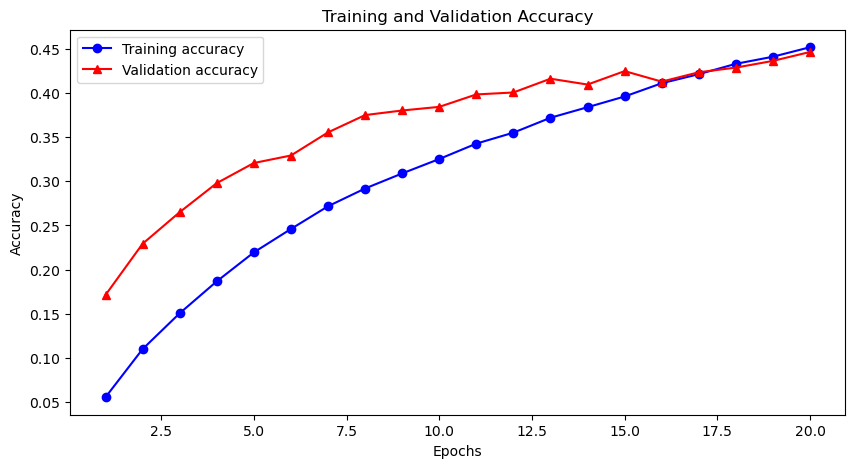

In [21]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Extracting accuracy and validation accuracy
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(accuracy) + 1)
    
    # Plotting the accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, accuracy, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r^-', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Example usage
plot_training_history(history)


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
Performance Improvement: The model's performance is likely to have improved due to the addition of BatchNormalization and ELU activation functions. BatchNormalization stabilizes and accelerates training by normalizing the inputs of each layer, while ELU helps in avoiding the vanishing gradient problem.

Reason for Improvement: These techniques enhance model learning efficiency and robustness. BatchNormalization reduces internal covariate shift, and ELU allows the network to converge faster and more accurately.

Room for Further Improvement: Yes, there's always room for further improvement. CIFAR-100 is a challenging dataset with 100 classes, making it harder to achieve high accuracy. Techniques like data augmentation, deeper architectures, learning rate schedules, and transfer learning could further enhance performance.

Future Techniques:
Data Augmentation: Introduce transformations like rotations, shifts, and flips to increase data diversity.
Deeper Architectures: Use deeper models like ResNet or DenseNet.
Transfer Learning: Use pre-trained models on similar datasets (e.g., ImageNet) and fine-tune them on CIFAR-100.
These methods could collectively contribute to better generalization and higher accuracy.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.